## ロジスティック回帰モデル

---

<a name='ex-03'></a>

### 予測関数

$$
f_{\mathbf{w},b}(\mathbf{x}) = g\left(\mathbf{w} \cdot \mathbf{x} + b \right)
$$

シグモイド関数 \( g(z) \) ：

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

---

### コスト関数

1サンプルあたりの損失：

$$
\text{loss}\left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}\right) = - y^{(i)} \log\left(f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right) - (1 - y^{(i)}) \log\left(1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right)
$$

---

### コスト関数（全体）

データセット全体のコスト関数は、全サンプルの平均損失：

$$
J(\mathbf{w}, b) = \frac{1}{m} \sum_{i=0}^{m-1} \text{loss}\left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}\right)
$$

---

### 勾配（偏微分）

パラメータ \( w_j \) とバイアス \( b \) に関する勾配：

$$
\frac{\partial J(\mathbf{w}, b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

$$
\frac{\partial J(\mathbf{w}, b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right)
$$

---

### パラメータ更新（勾配降下法）

学習率 \(\alpha\) を用いて、パラメータを更新する

$$
\begin{cases}
b := b - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b} \\
w_j := w_j - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial w_j} \quad (j=0,1,\ldots,n-1)
\end{cases}
$$

この操作を収束するまで繰り返す


実用プログラム

c:\Users\bsksh\Documents\programm\Python\machine learning\test\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learned weights: [-3.80005516e-02 -7.96640948e-01 -1.31591304e+00 -3.61016369e-04
  3.35920707e-02  3.91626616e-03]
Learned bias: -1.6988171284901648


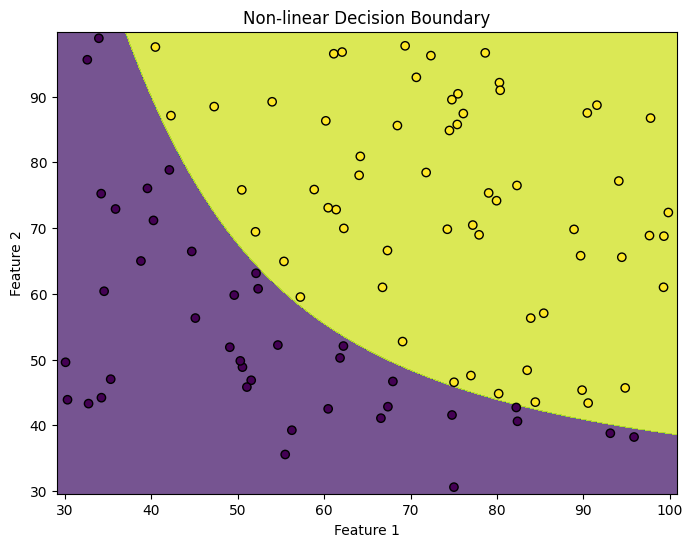

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
import copy
import math


%matplotlib inline
# データの読み込み
data = pd.read_csv("data/ex2data3.txt")
X_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values

# 特徴量を多項式変換する (例: 3次の多項式)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# ロジスティック回帰モデルの作成
model = LogisticRegression(solver='lbfgs')

# モデルの訓練
model.fit(X_train_poly, y_train)

# モデルの重みとバイアス
w = model.coef_[0]
b = model.intercept_[0]

# 結果表示
print("Learned weights:", w)
print("Learned bias:", b)

# 決定境界をプロットする
def plot_decision_boundary(X, y, model, poly):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Non-linear Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 決定境界をプロット
plot_decision_boundary(X_train, y_train, model, poly)


５クラス（Logi vs NN)

c:\Users\bsksh\Documents\programm\Python\machine learning\test\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\bsksh\Documents\programm\Python\machine learning\test\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bsksh\AppData\Local\Temp\ipykernel_23336\1844511012.py:22: MatplotlibDeprecationWarning: The get_cmap function wa

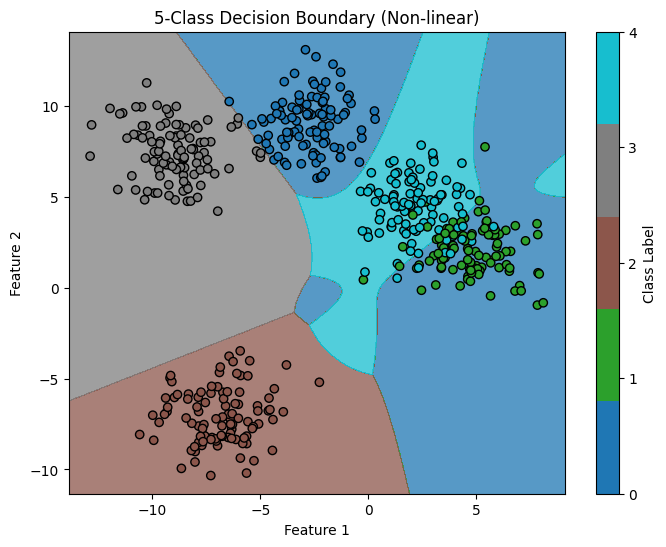

In [5]:

# --- 5クラスのデータを blob で生成 ---
X_train, y_train = make_blobs(n_samples=500, centers=5, n_features=2, cluster_std=1.5, random_state=42)

# --- 多項式特徴量に変換（非線形境界を可能に） ---
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# --- ロジスティック回帰（多クラス対応） ---
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_poly, y_train)

# --- 決定境界をプロットする関数 ---
def plot_decision_boundary(X, y, model, poly):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.get_cmap("tab10", 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap("tab10", 5))
    plt.title('5-Class Decision Boundary (Non-linear)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(ticks=range(5), label='Class Label')
    plt.show()

# --- 実行 ---
plot_decision_boundary(X_train, y_train, model, poly)


C:\Users\bsksh\AppData\Local\Temp\ipykernel_23336\498819598.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.get_cmap("tab10", 5))
C:\Users\bsksh\AppData\Local\Temp\ipykernel_23336\498819598.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap("tab10", 5))


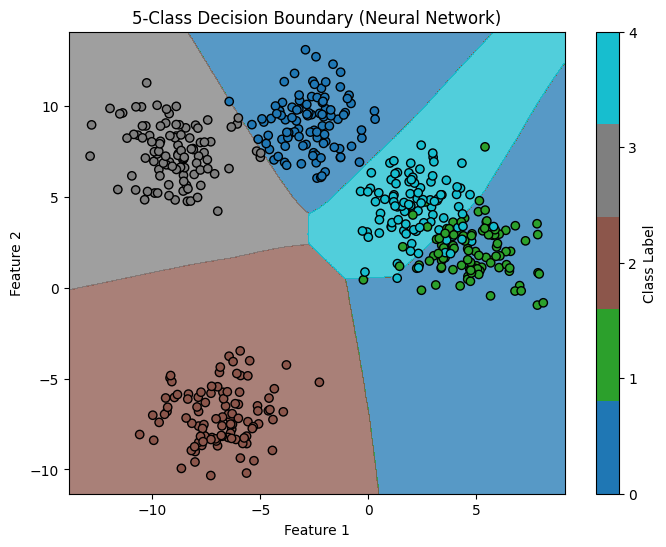

In [ ]:
# --- データ生成（5クラス） ---
X_train, y_train = make_blobs(n_samples=500, centers=5, n_features=2, cluster_std=1.5, random_state=42)

# --- 特徴量の標準化（MLPには重要） ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# --- ニューラルネット（MLP）分類器を構築 ---
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(X_scaled, y_train)

# --- 決定境界を描画する関数 ---
def plot_decision_boundary(X, y, model, scaler):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_scaled = scaler.transform(X_grid)
    Z = model.predict(X_grid_scaled)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.get_cmap("tab10", 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap("tab10", 5))
    plt.title('5-Class Decision Boundary (Neural Network)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(ticks=range(5), label='Class Label')
    plt.show()

# --- 決定境界を表示 ---
plot_decision_boundary(X_train, y_train, mlp, scaler)
